# **Manipulador robótico con 3 grados de libertad**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [37]:
import numpy as np
from sympy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

init_printing()

In [38]:
Image(url='../Examples/3.png')

In [39]:
Image(url='../Examples/4.png')

Vamos a descrbir el algebra simula la dinámica directa del anterior brazo robótico

In [40]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
theta_3 = symbols("theta_3",  real=True)
alpha = symbols("alpha",  real=True)

l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)
l_3 = symbols("l_3",  real=True)

Rotación de la base (articulación 1) un angulo theta zobre el eje z

In [41]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_1 sobre el eje z desde la base hasta la articulación 2

In [42]:
_1H2 = Matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, l_1], [0, 0, 0, 1]])
_1H2


⎡1  0  0  0 ⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  l₁⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación del sistema de referencia (90 grados sobre el eje X)

In [43]:
_2H3 = Matrix([[1, 0, 0, 0], [0, cos(alpha), -sin(alpha), 0], [0, sin(alpha), cos(alpha), 0], [0, 0, 0, 1]])
_2H3

⎡1    0        0     0⎤
⎢                     ⎥
⎢0  cos(α)  -sin(α)  0⎥
⎢                     ⎥
⎢0  sin(α)  cos(α)   0⎥
⎢                     ⎥
⎣0    0        0     1⎦

In [44]:
_2H3 = _2H3.subs(alpha, pi/2)
_2H3

⎡1  0  0   0⎤
⎢           ⎥
⎢0  0  -1  0⎥
⎢           ⎥
⎢0  1  0   0⎥
⎢           ⎥
⎣0  0  0   1⎦

Rotación theta_2 sobre el nuevo eje Z en la articulación 2

In [45]:
_3H4 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_3H4


⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Translación l_2 sobre el nuevo eje X desde la articulación 2 hasta la articulación 3

In [46]:
_4H5 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_4H5


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Rotación theta_3 sobre el nuevo eje Z para la articulación 3

In [47]:
_5H6 = Matrix([[cos(theta_3), -sin(theta_3), 0, 0], [sin(theta_3), cos(theta_3), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_5H6


⎡cos(θ₃)  -sin(θ₃)  0  0⎤
⎢                       ⎥
⎢sin(θ₃)  cos(θ₃)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

Traslación l_3 desde la articulación 3 hasta el efector final (muñeca)

In [48]:
_6H7 = Matrix([[1, 0, 0, l_3], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
_6H7

⎡1  0  0  l₃⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

Para encontrar la posición y la orientación del sistema de referencia W3 respecto a W0 se puede realizar la composición de las transformaciones de cada estado, así:

In [49]:
H = simplify(_0H1@_1H2@_2H3@_3H4@_4H5@_5H6@_6H7)
H

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁)   (l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅cos(θ₁)⎤
⎢                                                                                             ⎥
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)  (l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅sin(θ₁)⎥
⎢                                                                                             ⎥
⎢    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0        l₁ + l₂⋅sin(θ₂) + l₃⋅sin(θ₂ + θ₃)   ⎥
⎢                                                                                             ⎥
⎣         0                      0               0                        1                   ⎦

Esta será la posición final de la muñeca en función de theta1, theta2, theta3, l1, l2 y l3

In [50]:
P = H[0:3, 3]
P

⎡(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅cos(θ₁)⎤
⎢                                      ⎥
⎢(l₂⋅cos(θ₂) + l₃⋅cos(θ₂ + θ₃))⋅sin(θ₁)⎥
⎢                                      ⎥
⎣  l₁ + l₂⋅sin(θ₂) + l₃⋅sin(θ₂ + θ₃)   ⎦

Y esta será la orientación final de la muñeca en función theta1, theta2, theta3, l1, l2 y l3

In [51]:
R = H[0:3, 0:3]
R

⎡cos(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₂ + θ₃)⋅cos(θ₁)  sin(θ₁) ⎤
⎢                                                     ⎥
⎢sin(θ₁)⋅cos(θ₂ + θ₃)  -sin(θ₁)⋅sin(θ₂ + θ₃)  -cos(θ₁)⎥
⎢                                                     ⎥
⎣    sin(θ₂ + θ₃)          cos(θ₂ + θ₃)          0    ⎦

## Taller

Suponga un manipulador robotico con 3 grados de libertad. El brazo mide 40cm y el ante brazo mide 50cm. Los angulos de rotación no tienen restricciones. Suponga que la muñeca puede agarrar cualquier objeto que se encuentre a menos de 5cm de ella.

* Determine al menos 2 configuraciones de theta1, theta2 y theta3 que permitan alcanzar un objeto en la posición x=45, y=36, z=22. Utilice fuerza bruta para ello o cualquier estrategia objetiva para conseguirlo.

## Calificación

Los tres grupos con el mejor avance antes de finalizar la clase tendrá puntos extras en la calificación del corte, así:

* Mejor avance --> 0.3
* Segundo mejor avance --> 0.2
* Tercer mejor avance --> 0.1

In [52]:
def dibujar_brazo_mecanico(theta1, theta2, theta3, l1, l2, l3):

    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    z1 = l1 * np.sin(theta1)


    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    z2 = z1 + l2 * np.sin(theta2)


    x3 = x2 + l3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1 + theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta3)


    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot([0, x1], [0, y1], [0, z1], 'b-', linewidth=5)
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-', linewidth=5)
    ax.plot([x2, x3], [y2, y3], [z2, z3], 'b-', linewidth=5)
    ax.plot([0], [0], [0], 'ro', markersize=10)
    ax.plot([x3], [y3], [z3], 'go', markersize=10)

    ax.plot(45, 36, 22, 'mo') #Objeto para alcanzar

    ax.set_xlim([-l1 - l2, l1 + l2])
    ax.set_ylim([-l1 - l2, l1 + l2])
    ax.set_zlim([0, l1 + l2 + l3])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Brazo robótico 3D')
    plt.show()


2 configuraciones de theta1, theta2 y theta3

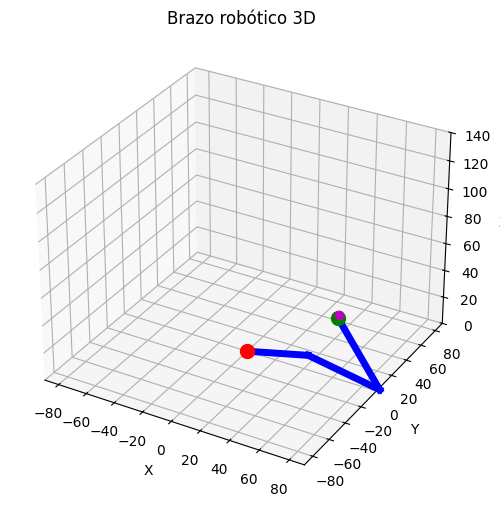

In [53]:
#1
#theta1 = np.deg2rad(10)
#theta2 = np.deg2rad(350)
#theta3 = np.deg2rad(150)
#2
theta1 = np.deg2rad(9)
theta2 = np.deg2rad(350)
theta3 = np.deg2rad(150)

l1 = 40
l2 = 50
l3 = 50
dibujar_brazo_mecanico(theta1, theta2, theta3, l1, l2, l3)

Angulos posibles 1: theta1=9.025069637883007°, theta2=348.9693593314763°, theta3=147.40947075208913°
Angulos posibles 2: theta1=9.025069637883007°, theta2=348.9693593314763°, theta3=148.41225626740945°


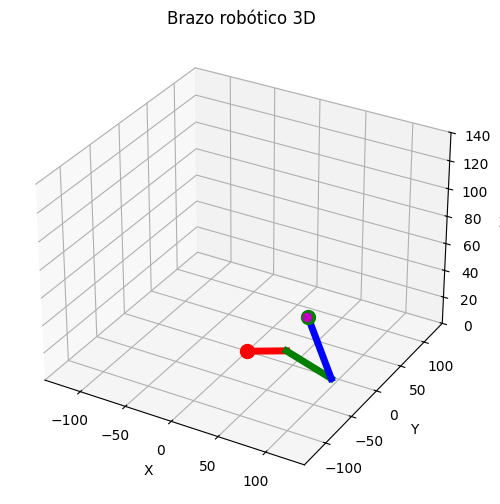

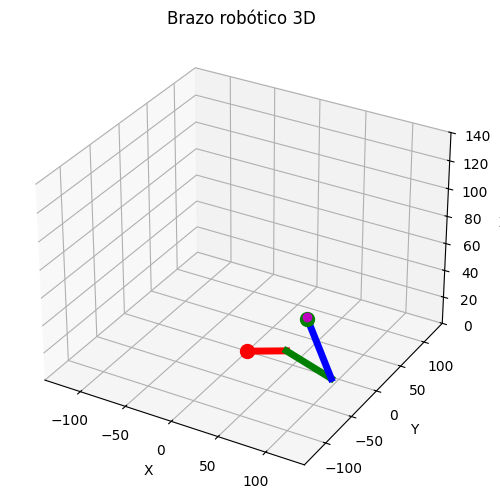

In [54]:
"""
Simulación de un brazo robótico de 3 grados de libertad (DOF) que intenta alcanzar
una posición objetivo en el espacio 3D mediante una búsqueda por fuerza bruta
de combinaciones de ángulos.

El objetivo es encontrar configuraciones de (theta1, theta2, theta3) que acerquen
el extremo del brazo a una distancia menor o igual a 5cm del punto objetivo.
"""

# brazos
l1 = 40
l2 = 50
l3 = 50

# objetivo
punto_x = 45
punto_y = 36
punto_z = 22

# Tolerancia para alcanzar el objetivo
tolerancia = 5

def cinematicas(theta1, theta2, theta3, l1, l2, l3):
    """
    Calcula la posición (x, y, z) del extremo del brazo robótico dado un conjunto
    de ángulos y longitudes de los segmentos.

    Parametros:
    - theta1, theta2, theta3: Ángulos de las articulaciones (en radianes)
    - l1, l2, l3: Longitudes de los segmentos del brazo

    Returns:
    - x3, y3, z3: Coordenadas finales del brazo robótico
    """
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    z1 = l1 * np.sin(theta1)

    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    z2 = z1 + l2 * np.sin(theta2)

    x3 = x2 + l3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1 + theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta3)

    return x3, y3, z3

def tolerancia_distancia(x, y, z, punto_x, punto_y, punto_z, tolerancia):
    """
    Verifica si una posición (x, y, z) está dentro de la distancia de tolerancia
    respecto a un punto objetivo.

    Parametros:
    - x, y, z: Coordenadas del punto alcanzado por el brazo
    - punto_x, punto_y, punto_z: Coordenadas del punto objetivo
    - tolerancia: Distancia máxima permitida

    Returns:
    - True si está dentro de la tolerancia, False en caso contrario
    """
    distancia = np.sqrt((x - punto_x)**2 + (y - punto_y)**2 + (z - punto_z)**2) #Distancia ecluidiana
    return distancia <= tolerancia

# Buscar configuraciones de theta1, theta2 y theta3 que permitan alcanzar el objetivo
angulosPosibles = []
for theta1 in np.linspace(0, 2*np.pi, 360):
    for theta2 in np.linspace(0, 2*np.pi, 360):
        for theta3 in np.linspace(0, 2*np.pi, 360):
            x, y, z = cinematicas(theta1, theta2, theta3, l1, l2, l3)
            if tolerancia_distancia(x, y, z, punto_x, punto_y, punto_z, tolerancia):
                angulosPosibles.append((theta1, theta2, theta3))
                if len(angulosPosibles) >= 2:
                    break
        if len(angulosPosibles) >= 2:
            break
    if len(angulosPosibles) >= 2:
        break

# Imprimir las configuraciones encontradas
for i, config in enumerate(angulosPosibles):
    print(f"Angulos posibles {i+1}: theta1={np.degrees(config[0])}°, theta2={np.degrees(config[1])}°, theta3={np.degrees(config[2])}°")

# Dibujar el brazo robótico con las configuraciones encontradas
def dibujar_brazo_mecanico(theta1, theta2, theta3, l1, l2, l3):
    """
    Dibuja el brazo robótico en un gráfico 3D mostrando su estructura y la posición objetivo.

    Parametros:
    - theta1, theta2, theta3: Ángulos de las articulaciones (en radianes)
    - l1, l2, l3: Longitudes de los segmentos del brazo
    """
    x1 = l1 * np.cos(theta1)
    y1 = l1 * np.sin(theta1)
    z1 = l1 * np.sin(theta1)

    x2 = x1 + l2 * np.cos(theta1 + theta2)
    y2 = y1 + l2 * np.sin(theta1 + theta2)
    z2 = z1 + l2 * np.sin(theta2)

    x3 = x2 + l3 * np.cos(theta1 + theta2 + theta3)
    y3 = y2 + l3 * np.sin(theta1 + theta2 + theta3)
    z3 = z2 + l3 * np.sin(theta3)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot([0, x1], [0, y1], [0, z1], 'r-', linewidth=5)
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'g-', linewidth=5)
    ax.plot([x2, x3], [y2, y3], [z2, z3], 'b-', linewidth=5)
    ax.plot([0], [0], [0], 'ro', markersize=10)
    ax.plot([x3], [y3], [z3], 'go', markersize=10)

    ax.plot([punto_x], [punto_y], [punto_z], 'mo') # Objeto para alcanzar

    ax.set_xlim([-l1 - l2 - l3, l1 + l2 + l3])
    ax.set_ylim([-l1 - l2 - l3, l1 + l2 + l3])
    ax.set_zlim([0, l1 + l2 + l3])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Brazo robótico 3D')

    plt.show()

# Dibujar las configuraciones encontradas
for config in angulosPosibles:
    dibujar_brazo_mecanico(config[0], config[1], config[2], l1, l2, l3)
